# Stock Momentum Case Study

In [1]:
import pandas as pd
import numpy as np

## Step 1: Import Datasets

In [2]:
FF = pd.read_csv("Fama_French_daily.csv") # Fama-French Dataset
daily_prices = pd.read_parquet("sp500_daily_prices.parquet")

In [165]:
FF

,date,Mkt_RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25518,20230626,-0.48,-0.32,1.30,0.019
25519,20230627,1.21,0.47,-0.51,0.019
25520,20230628,0.04,0.55,-0.40,0.019
25521,20230629,0.44,0.53,0.77,0.019


In [166]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25523 entries, 0 to 25522
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    25523 non-null  int64  
 1   Mkt_RF  25523 non-null  float64
 2   SMB     25523 non-null  float64
 3   HML     25523 non-null  float64
 4   RF      25523 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 997.1 KB


In [169]:
daily_prices

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A
2546,2010-01-06,30.85,A
2547,2010-01-07,30.81,A
2548,2010-01-08,30.80,A
...,...,...,...
24292494,2023-08-01,185.51,ZTS
24292495,2023-08-02,182.00,ZTS
24292496,2023-08-03,180.88,ZTS
24292497,2023-08-04,178.63,ZTS


In [170]:
daily_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1612139 entries, 2544 to 24292498
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1612139 non-null  datetime64[us]
 1   close   1612139 non-null  float64       
 2   symbol  1612139 non-null  object        
dtypes: datetime64[us](1), float64(1), object(1)
memory usage: 49.2+ MB


## Step 2: Cleaning, Calculations and Merging
1) Parse dates
2) Fama-French Dataset - Calculate Market Return and rescale
3) Daily Stocks Dataset - Calculate daily returns
4) Merge
5) Calculate daily excess returns
6) Detect and delete outliers
7) Exploratory statistics

In [3]:
FF.head(2)

,date,Mkt_RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009


In [4]:
FF.date = pd.to_datetime(FF.date, format="%Y%m%d")

In [5]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25523 entries, 0 to 25522
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    25523 non-null  datetime64[ns]
 1   Mkt_RF  25523 non-null  float64       
 2   SMB     25523 non-null  float64       
 3   HML     25523 non-null  float64       
 4   RF      25523 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 997.1 KB


In [6]:
FF["Mkt"] = FF.Mkt_RF + FF.RF
FF.head(3)

,date,Mkt_RF,SMB,HML,RF,Mkt
0,1926-07-01,0.10,-0.25,-0.27,0.009,0.109
1,1926-07-02,0.45,-0.33,-0.06,0.009,0.459
2,1926-07-06,0.17,0.30,-0.39,0.009,0.179


In [7]:
FF.loc[:, "Mkt_RF":"Mkt"] = FF.loc[:, "Mkt_RF":"Mkt"]/100
FF.head(3)

,date,Mkt_RF,SMB,HML,RF,Mkt
0,1926-07-01,0.0010,-0.0025,-0.0027,0.00009,0.00109
1,1926-07-02,0.0045,-0.0033,-0.0006,0.00009,0.00459
2,1926-07-06,0.0017,0.0030,-0.0039,0.00009,0.00179


In [8]:
daily_prices.head(10)

,date,close,symbol
2544,2010-01-04,31.30,A
2545,2010-01-05,30.96,A
2546,2010-01-06,30.85,A
2547,2010-01-07,30.81,A
2548,2010-01-08,30.80,A
2549,2010-01-11,30.82,A
2550,2010-01-12,30.45,A
2551,2010-01-13,30.69,A
2552,2010-01-14,31.15,A
2553,2010-01-15,30.43,A


In [9]:
daily_prices["ret"] = daily_prices.groupby("symbol")["close"].pct_change(1)

In [10]:
daily_prices.loc[daily_prices.symbol=="IBM"]

,date,close,symbol,ret
10871483,2010-01-04,132.45,IBM,NaN
10871484,2010-01-05,130.85,IBM,-0.012080
10871485,2010-01-06,130.00,IBM,-0.006496
10871486,2010-01-07,129.55,IBM,-0.003462
10871487,2010-01-08,130.85,IBM,0.010035
...,...,...,...,...
10874902,2023-08-01,143.33,IBM,-0.005895
10874903,2023-08-02,144.17,IBM,0.005861
10874904,2023-08-03,144.45,IBM,0.001942
10874905,2023-08-04,144.24,IBM,-0.001454


In [11]:
data = (daily_prices
        .merge(FF[["date", "Mkt"]], on="date", how = "inner")
        .sort_values(["symbol", "date"])
       )

In [12]:
data[data.symbol=="AAPL"]

,date,close,symbol,ret,Mkt
2,2010-01-04,7.6432,AAPL,NaN,0.01690
433,2010-01-05,7.6564,AAPL,0.001727,0.00310
864,2010-01-06,7.5346,AAPL,-0.015908,0.00130
1296,2010-01-07,7.5207,AAPL,-0.001845,0.00400
1728,2010-01-08,7.5707,AAPL,0.006648,0.00330
...,...,...,...,...,...
1597363,2023-06-26,185.2700,AAPL,-0.007553,-0.00461
1597855,2023-06-27,188.0600,AAPL,0.015059,0.01229
1598347,2023-06-28,189.2500,AAPL,0.006328,0.00059
1598839,2023-06-29,189.5900,AAPL,0.001797,0.00459


In [13]:
data["excess_ret"] = data["ret"] - data["Mkt"]

In [14]:
data[data.symbol=="AAPL"]

,date,close,symbol,ret,Mkt,excess_ret
2,2010-01-04,7.6432,AAPL,NaN,0.01690,NaN
433,2010-01-05,7.6564,AAPL,0.001727,0.00310,-0.001373
864,2010-01-06,7.5346,AAPL,-0.015908,0.00130,-0.017208
1296,2010-01-07,7.5207,AAPL,-0.001845,0.00400,-0.005845
1728,2010-01-08,7.5707,AAPL,0.006648,0.00330,0.003348
...,...,...,...,...,...,...
1597363,2023-06-26,185.2700,AAPL,-0.007553,-0.00461,-0.002943
1597855,2023-06-27,188.0600,AAPL,0.015059,0.01229,0.002769
1598347,2023-06-28,189.2500,AAPL,0.006328,0.00059,0.005738
1598839,2023-06-29,189.5900,AAPL,0.001797,0.00459,-0.002793


In [15]:
data.describe()

,date,close,ret,Mkt,excess_ret
count,1599821,1.599821e+06,1.599329e+06,1.599821e+06,1.599329e+06
mean,2016-11-22 15:47:24.923525,9.885430e+01,6.521673e-04,5.459307e-04,1.105751e-04
min,2010-01-04 00:00:00,6.990000e-01,-8.205564e-01,-1.199400e-01,-8.227364e-01
25%,2013-07-31 00:00:00,3.510000e+01,-8.178975e-03,-4.020000e-03,-7.074404e-03
50%,2016-12-14 00:00:00,6.080000e+01,6.694934e-04,7.700000e-04,-6.566098e-05
75%,2020-04-02 00:00:00,1.074500e+02,9.540636e-03,6.000000e-03,7.060970e-03
max,2023-06-30 00:00:00,6.350620e+03,9.270531e+00,9.346000e-02,9.262831e+00
std,NaN,1.808514e+02,2.348041e-02,1.147204e-02,2.045669e-02


In [16]:
data.symbol.nunique()

492

## Step 3: Calculate Momentum Indicators/Proxies
100-Day & 200-Day Simple Moving Averages (SMA)

In [17]:
data

,date,close,symbol,ret,Mkt,excess_ret
0,2010-01-04,31.30,A,NaN,0.01690,NaN
431,2010-01-05,30.96,A,-0.010863,0.00310,-0.013963
862,2010-01-06,30.85,A,-0.003553,0.00130,-0.004853
1294,2010-01-07,30.81,A,-0.001297,0.00400,-0.005297
1726,2010-01-08,30.80,A,-0.000325,0.00330,-0.003625
...,...,...,...,...,...,...
1597852,2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320
1598344,2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392
1598836,2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789
1599328,2023-06-29,171.87,ZTS,0.016381,0.00459,0.011791


In [18]:
data = data.set_index("date")
data

,close,symbol,ret,Mkt,excess_ret
date,,,,,
2010-01-04,31.30,A,NaN,0.01690,NaN
2010-01-05,30.96,A,-0.010863,0.00310,-0.013963
2010-01-06,30.85,A,-0.003553,0.00130,-0.004853
2010-01-07,30.81,A,-0.001297,0.00400,-0.005297
2010-01-08,30.80,A,-0.000325,0.00330,-0.003625
...,...,...,...,...,...
2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320
2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392
2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789


In [19]:
MA_100 = data.groupby("symbol").rolling(100)["excess_ret"].mean().reset_index()
MA_200 = data.groupby("symbol").rolling(200)["excess_ret"].mean().reset_index()

In [20]:
MA_200.head(2)

,symbol,date,excess_ret
0,A,2010-01-04,NaN
1,A,2010-01-05,NaN


In [21]:
MA_100 = MA_100.rename({"excess_ret": "MA_100"}, axis=1)
MA_200 = MA_200.rename({"excess_ret": "MA_200"}, axis=1)

In [22]:
MA_200.head(2)

,symbol,date,MA_200
0,A,2010-01-04,NaN
1,A,2010-01-05,NaN


In [23]:
data.head(2)

,close,symbol,ret,Mkt,excess_ret
date,,,,,
2010-01-04,31.30,A,NaN,0.0169,NaN
2010-01-05,30.96,A,-0.010863,0.0031,-0.013963


In [24]:
data = data.reset_index()
data.head(2)

,date,close,symbol,ret,Mkt,excess_ret
0,2010-01-04,31.30,A,NaN,0.0169,NaN
1,2010-01-05,30.96,A,-0.010863,0.0031,-0.013963


In [25]:
data = data.merge(MA_100, on=["symbol", "date"])
data = data.merge(MA_200, on=["symbol", "date"])

In [27]:
data = data.dropna().copy()

In [28]:
data[data.symbol=="AAPL"]

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200
7034,2010-10-19,11.0532,AAPL,-0.026759,-0.01669,-0.010069,0.001428,0.001657
7035,2010-10-20,11.0904,AAPL,0.003366,0.01061,-0.007244,0.001099,0.001627
7036,2010-10-21,11.0543,AAPL,-0.003255,0.00111,-0.004365,0.000712,0.001692
7037,2010-10-22,10.9811,AAPL,-0.006622,0.00291,-0.009532,0.000761,0.001673
7038,2010-10-25,11.0300,AAPL,0.004453,0.00311,0.001343,0.000860,0.001663
...,...,...,...,...,...,...,...,...
10246,2023-06-26,185.2700,AAPL,-0.007553,-0.00461,-0.002943,0.001952,0.000434
10247,2023-06-27,188.0600,AAPL,0.015059,0.01229,0.002769,0.002021,0.000527
10248,2023-06-28,189.2500,AAPL,0.006328,0.00059,0.005738,0.001864,0.000530
10249,2023-06-29,189.5900,AAPL,0.001797,0.00459,-0.002793,0.001486,0.000560


## Step 4: Calculate forward-looking returns windows
50-day, 100-day, 200-day returns

In [29]:
data = data.sort_values(["symbol", "date"])
data

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383
202,2010-10-21,34.75,A,0.002597,0.00111,0.001487,0.000106,0.000414
203,2010-10-22,34.75,A,0.000000,0.00291,-0.002910,0.000105,0.000426
204,2010-10-25,34.90,A,0.004317,0.00311,0.001207,0.000116,0.000451
...,...,...,...,...,...,...,...,...
1608636,2023-06-26,167.54,ZTS,-0.004930,-0.00461,-0.000320,-0.000390,-0.000158
1608637,2023-06-27,170.67,ZTS,0.018682,0.01229,0.006392,-0.000346,-0.000179
1608638,2023-06-28,169.10,ZTS,-0.009199,0.00059,-0.009789,-0.000478,-0.000182
1608639,2023-06-29,171.87,ZTS,0.016381,0.00459,0.011791,-0.000279,-0.000141


In [30]:
data["close_50D"] = data.groupby("symbol")["close"].shift(-50)
data["close_100D"] = data.groupby("symbol")["close"].shift(-100)
data["close_200D"] = data.groupby("symbol")["close"].shift(-200)

In [31]:
data["ret_50D"] = data.close_50D / data.close - 1
data["ret_100D"] = data.close_100D / data.close - 1
data["ret_200D"] = data.close_200D / data.close - 1

In [32]:
data = data.dropna().copy()

In [33]:
data.describe()

,date,close,ret,Mkt,excess_ret,MA_100,MA_200,close_50D,close_100D,close_200D,ret_50D,ret_100D,ret_200D
count,1412874,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06,1.412874e+06
mean,2016-11-30 02:48:02.733491,9.853062e+01,6.179741e-04,5.001856e-04,1.177885e-04,1.204121e-04,1.222478e-04,1.006748e+02,1.028504e+02,1.073608e+02,3.074822e-02,6.046290e-02,1.217978e-01
min,2010-10-19 00:00:00,6.990000e-01,-8.205564e-01,-1.199400e-01,-8.227364e-01,-1.862517e-02,-1.229943e-02,6.990000e-01,6.990000e-01,6.990000e-01,-8.870043e-01,-9.135802e-01,-9.609520e-01
25%,2013-12-18 00:00:00,3.652000e+01,-8.021862e-03,-3.860000e-03,-6.959743e-03,-7.660982e-04,-5.197731e-04,3.722000e+01,3.785000e+01,3.917000e+01,-4.139222e-02,-4.858718e-02,-4.848739e-02
50%,2016-12-20 00:00:00,6.218000e+01,6.869550e-04,8.000000e-04,-5.799043e-05,8.650437e-05,7.651592e-05,6.336000e+01,6.453000e+01,6.695000e+01,2.886404e-02,5.148846e-02,9.316692e-02
75%,2019-11-22 00:00:00,1.077200e+02,9.383458e-03,5.800000e-03,6.971344e-03,9.309586e-04,6.748743e-04,1.101900e+02,1.127700e+02,1.173800e+02,9.787820e-02,1.516449e-01,2.429250e-01
max,2022-10-12 00:00:00,5.959330e+03,9.270531e+00,9.346000e-02,9.262831e+00,9.398033e-02,5.049223e-02,5.959330e+03,5.959330e+03,6.350620e+03,1.032796e+01,1.224611e+01,2.540994e+01
std,NaN,1.735852e+02,2.343972e-02,1.140034e-02,2.044321e-02,1.979053e-03,1.422112e-03,1.773028e+02,1.814227e+02,1.917134e+02,1.590211e-01,2.306730e-01,3.612279e-01


## Step 5: Form Portfolios according to Stock Momentum

In [34]:
data["decile_100"] = data.groupby("date")["MA_100"].transform(pd.qcut, 10, labels=False, duplicates="drop")
data["decile_200"] = data.groupby("date")["MA_200"].transform(pd.qcut, 10, labels=False, duplicates="drop")

In [37]:
data.head(2)

,date,close,symbol,ret,Mkt,excess_ret,MA_100,MA_200,close_50D,close_100D,close_200D,ret_50D,ret_100D,ret_200D,decile_100,decile_200
200,2010-10-19,34.02,A,-0.018465,-0.01669,-0.001775,-0.000075,0.000272,41.59,44.84,36.91,0.222516,0.318048,0.084950,4,5
201,2010-10-20,34.66,A,0.018812,0.01061,0.008202,0.000009,0.000383,41.43,43.82,36.59,0.195326,0.264282,0.055684,4,5


In [36]:
# Summary stats by decile groups

In [47]:
result_ma_100 = (data
                .groupby("decile_100")[["ret_50D", "ret_100D", "ret_200D"]]
                .agg(["mean", "median", "sem"])
                .reset_index()
                )

In [48]:
result_ma_200 = (data
                 .groupby("decile_200")[["ret_50D", "ret_100D", "ret_200D"]]
                 .agg(["mean", "median", "sem"])
                .reset_index()
                )


In [49]:
result_ma_100

decile_100   ret_50D                      ret_100D                      \
                  mean    median       sem      mean    median       sem   
0          0  0.036633  0.031050  0.000471  0.069131  0.057372  0.000714   
1          1  0.030191  0.028471  0.000497  0.057069  0.049392  0.000654   
2          2  0.028696  0.028083  0.000451  0.057654  0.050156  0.000647   
3          3  0.026637  0.027707  0.000318  0.054748  0.050017  0.000486   
4          4  0.025945  0.027365  0.000316  0.053228  0.048650  0.000462   
5          5  0.026643  0.028784  0.000318  0.053285  0.049683  0.000462   
6          6  0.027910  0.028091  0.000343  0.054185  0.051012  0.000484   
7          7  0.028729  0.027263  0.000360  0.055711  0.049976  0.000504   
8          8  0.032355  0.029051  0.000505  0.061720  0.051784  0.000634   
9          9  0.043543  0.034563  0.000554  0.087515  0.059465  0.000915   

   ret_200D                      
       mean    median       sem  
0  0.140137  0.090427  0.001269  
1  0.116642  0.089232  0.000957  
2  0.114366  0.086664  0.000929  
3  0.108828  0.086316  0.000788  
4  0.105541  0.088429  0.000728  
5  0.105780  0.091499  0.000730  
6  0.108738  0.092021  0.000777  
7  0.112968  0.096511  0.000812  
8  0.124056  0.101181  0.000938  
9  0.180098  0.114657  0.001396

In [50]:
result_ma_200

decile_200   ret_50D                      ret_100D                      \
                  mean    median       sem      mean    median       sem   
0          0  0.033893  0.027569  0.000487  0.062355  0.049194  0.000693   
1          1  0.028023  0.026437  0.000367  0.056991  0.048762  0.000537   
2          2  0.028584  0.027660  0.000399  0.056040  0.049204  0.000534   
3          3  0.026709  0.025754  0.000439  0.056708  0.048943  0.000692   
4          4  0.027129  0.027916  0.000411  0.054839  0.049845  0.000593   
5          5  0.026597  0.028482  0.000326  0.053684  0.051163  0.000485   
6          6  0.026714  0.028129  0.000320  0.053445  0.049801  0.000487   
7          7  0.028940  0.029872  0.000336  0.055457  0.051130  0.000526   
8          8  0.033633  0.031826  0.000416  0.065025  0.056035  0.000632   
9          9  0.047054  0.036980  0.000628  0.089752  0.062379  0.000846   

   ret_200D                      
       mean    median       sem  
0  0.132918  0.085958  0.001169  
1  0.113087  0.086620  0.000890  
2  0.110324  0.087910  0.000818  
3  0.109192  0.087432  0.000911  
4  0.109716  0.089466  0.000915  
5  0.107152  0.091953  0.000807  
6  0.106240  0.092372  0.000775  
7  0.113431  0.094781  0.000878  
8  0.130169  0.104383  0.000986  
9  0.184951  0.117132  0.001296

## Step 6: Visualize the results

In [51]:
result_ma_100.head(2)

decile_100   ret_50D                      ret_100D                      \
                  mean    median       sem      mean    median       sem   
0          0  0.036633  0.031050  0.000471  0.069131  0.057372  0.000714   
1          1  0.030191  0.028471  0.000497  0.057069  0.049392  0.000654   

   ret_200D                      
       mean    median       sem  
0  0.140137  0.090427  0.001269  
1  0.116642  0.089232  0.000957

<Axes: xlabel='decile_100'>

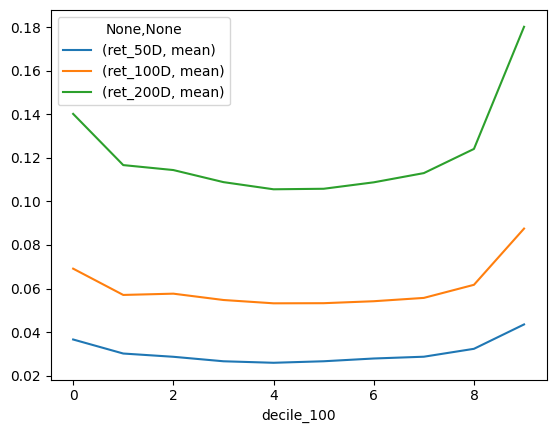

In [53]:
result_ma_100.plot(x="decile_100", y=[("ret_50D", "mean"), ("ret_100D", "mean"), ("ret_200D", "mean"),])

<Axes: xlabel='decile_200'>

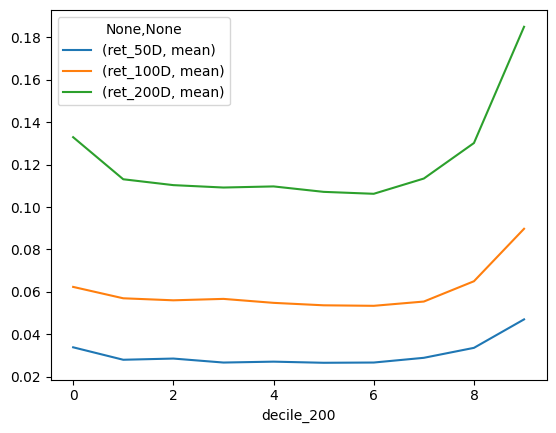

In [54]:
# Use 200 Day MA to predict future stock returns:
result_ma_200.plot(x="decile_200", y=[("ret_50D", "mean"), ("ret_100D", "mean"), ("ret_200D", "mean"),])